number of columns: 21
name of the columns:
Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')
number of non pois / pois: 128 / 18
Number of missing values in data
poi                            0
total_stock_value             20
total_payments                21
email_address                 35
restricted_stock              36
exercised_stock_options       44
salary                        51
expenses                      51
other                         53
to_messages                   60
shared_receipt_with_poi       60
from_messages                 60
from_poi_t

/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [8] are constant.
  UserWarning)
/Users/sarauenoyam

accuracy, precision and recall scores of each classifier
                                                 clf     score  precision    recall
0                                       GaussianNB()  0.357143   0.420168  0.357143
1  SVC(C=1.0, cache_size=200, class_weight=None, ...  0.476190   0.226757  0.476190
2  DecisionTreeClassifier(class_weight=None, crit...  0.452381   0.455890  0.452381
feature importances by order
deferral_payments : 0.326375362507
deferred_income : 0.0816206474563
director_fees : 0.0772527867539
exercised_stock_options : 0.0696879193178
expenses : 0.0645413613473
from_messages : 0.060629972979
from_poi_to_this_person : 0.0433510133549
from_this_person_to_poi : 0.0425250461131
loan_advances : 0.04090377873
long_term_incentive : 0.0393888239623
other : 0.0360736825123
poi : 0.029996104402
restricted_stock : 0.0254512400987
restricted_stock_deferred : 0.0240254003172
salary : 0.0199974029347
shared_receipt_with_poi : 0.00908972860667
to_messages : 0.00908972860667
to

/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [6] are constant.
  UserWarning)


best parameters set
{'DT__criterion': 'gini', 'DT__max_depth': None, 'DT__min_samples_leaf': 2, 'DT__min_samples_split': 6}
0.785714285714 0.2 0.166666666667
GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('kbest', SelectKBest(k=17, score_func=<function f_classif at 0x110a01050>)), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'DT__criterion': ['gini', 'entropy'], 'DT__max_depth': [None, 5, 10, 15, 20], 'DT__min_samples_split': [2, 4, 6, 8, 10, 20], 'DT__min_samples_leaf': [2, 4, 6, 8, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/sarauenoyama/anaconda2/envs/DAND/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


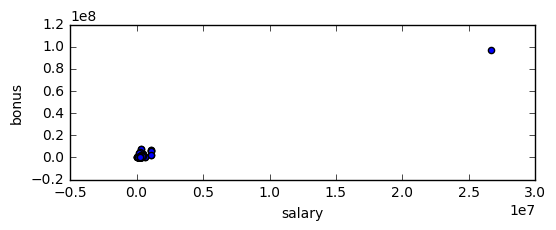

In [2]:
# %load poi_id_submit2.py
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

# read the all data
## Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

# data overview
import pandas as pd
import numpy as np
df = pd.DataFrame(data_dict)
df = df.T
number_of_non_poi, number_of_poi = df['poi'].value_counts()
print "number of columns:", len(df.columns)
print "name of the columns:\n", df.columns
print "number of non pois / pois:", number_of_non_poi, '/', number_of_poi

all_features_list = df.columns
nan_index = df.columns
nan_columns = ['non_nan', 'nan', 'nan_poi','nan_non_poi', 'poi_nan_ratio', 'non_poi_nan_ratio']
df_nan = pd.DataFrame(index=nan_index, columns=nan_columns)
df_nan = df_nan.fillna(0)

for i in all_features_list:
    for j in df.index:
        if df[i][j] == 'NaN':
            df_nan['nan'][i]+=1
            if df['poi'][j] == True:
                df_nan['nan_poi'][i]+=1
            else:
                df_nan['nan_non_poi'][i]+=1
        else:
            df_nan['non_nan'][i]+=1

# poi_nan_ratio column
for i in all_features_list:
    if df_nan['nan_poi'][i] == 0:
        df_nan['poi_nan_ratio'][i] == 'NaN'
    else:
        df_nan['poi_nan_ratio'][i] = round((df_nan['nan_poi'][i])*100.0/number_of_poi, 2)

# non_poi_nan_ratio column
for i in all_features_list:
    if df_nan['nan_non_poi'][i] == 0:
            df_nan['non_poi_nan_ratio'][i] == 'NaN'
    else:
        df_nan['non_poi_nan_ratio'][i] = round((df_nan['nan_non_poi'][i])*100.0/number_of_non_poi, 2)

df_nan_1 = df_nan[['non_nan', 'nan']].sort_values(by=['nan'], ascending = True)
df_nan_2 = df_nan[['poi_nan_ratio', 'non_poi_nan_ratio']].sort_values(by=['poi_nan_ratio'], ascending = True)


print 'Number of missing values in data'       
print df_nan_1['nan']

print 'Ratio of missing values in POI / non-POIs'     
print df_nan_2



import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(6,2))

### Task 2: Remove outliers
# plot the salary and the bonus data
features_outliers = ["salary", "bonus"]
data_outliers = featureFormat(data_dict, features_outliers)

for point in data_outliers:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary,bonus)

plt.xlabel("salary")
plt.ylabel("bonus");

# find the key of outlier
for key, value in data_dict.items():
    if value['bonus'] == data_outliers.max():
        print 'max:', key, data_outliers.max()

# remove the outlier 'TOTAL'
data_dict.pop('TOTAL', 0 )

# second plot
data_outliers = featureFormat(data_dict, features_outliers)
for point in data_outliers:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary,bonus)
    
plt.xlabel("salary")
plt.ylabel("bonus");

outlier_bonus =5000000
outlier_salary = 500000

both_outlier = []
for key, value in data_dict.items():
    if value['bonus'] == 'NaN':
        pass
    elif value['bonus'] > outlier_bonus:
        if value['salary'] > outlier_salary:
            both_outlier.append(key)
    else:
        pass
print 'people whose both bonus and salary are away from other data points'   
print both_outlier

bonus_outlier = []
for key, value in data_dict.items():
    if value['bonus'] == 'NaN':
        pass
    elif value['bonus'] > outlier_bonus:
        if value['salary'] > outlier_salary:
            pass
        else:
            bonus_outlier.append(key)
    else:
        pass

print 'people whose only bonus is away from other data points'       
print bonus_outlier

salary_outlier = []
for key, value in data_dict.items():
    if value['salary'] == 'NaN':
        pass
    elif value['salary'] > outlier_salary:
        if value['bonus'] > outlier_bonus:
            pass
        else:
            salary_outlier.append(key)
    else:
        pass

print 'people whose only bonus is away from other data points'       
print salary_outlier

# find poi/non-poi of outlier
outlier_list = both_outlier + bonus_outlier + salary_outlier

poi_outlier = []
non_poi_outlier = []
for key in outlier_list:
    poi_value = df.get_value(index=key, col='poi')
    if poi_value == True:
        poi_outlier.append(key)
        print '{:>20}: {}'.format(key, poi_value)
    else:
        non_poi_outlier.append(key)  
        print '{:>20}: {}'.format(key, poi_value)

# remove the non-poi outlier
for key in non_poi_outlier:
    data_dict.pop(key, 0 )

# total number of poi nd non-poi after outlier removal    
df = pd.DataFrame(data_dict)
df = df.T
number_of_non_poi, number_of_poi = df['poi'].value_counts()
print "number of non-pois / pois:", number_of_non_poi, '/', number_of_poi




### Store to my_dataset for easy export below.
my_dataset = data_dict

# all features initially available
features_list = list(all_features_list)
# remove email address from all features
features_list.remove('email_address')

### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# split data into train and test data
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import precision_score, recall_score

# loop over several models to find the best one [1][5]

def clf_df(features_train, labels_train, features_test, labels_test):
    classifiers = [
        GaussianNB(),
        svm.SVC(),
        DecisionTreeClassifier()
    ]

    clf_col = ['clf', 'score', 'precision', 'recall']
    clf_df = pd.DataFrame(index=[], columns=clf_col)

    average_score = 0
    for clf in classifiers:
        steps = [('clf', clf)]
        pipeline = Pipeline(steps)
        clf.fit(features_train, labels_train)
        pred = clf.predict(features_test)
        score = clf.score(features_test, labels_test)
        precision = precision_score(labels_test, pred, average='weighted')
        recall = recall_score(labels_test, pred, average='weighted') 

        series = pd.Series([clf, score, precision, recall], index=clf_df.columns)
        clf_df = clf_df.append(series, ignore_index = True)

    print 'accuracy, precision and recall scores of each classifier'
    pd.set_option('display.width', 100)
    print clf_df

clf_df(features_train, labels_train, features_test, labels_test)

# from the clf_data result, choose the best algorithm to predict poi / non-poi
clf = DecisionTreeClassifier()

# features scaling is not needed with DecisionTreeClassifier() in general [3][4]

# feature importances on decision tree classifier
clf.fit(features, labels)
FeatureImportances = clf.feature_importances_
FeatureImportances = sorted(FeatureImportances, reverse=True)
features_list_rm_poi = list(features_list)
features_list_rm_poi.pop(0)

print 'feature importances by order'
for i, feat in enumerate(features_list_rm_poi):
    print feat, ':', FeatureImportances[i]
    

    
### Task 3: Create new feature(s)
from fractions import Fraction

### new feature 1: portion of from/to poi messages within all from/to messages
def computeFraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """

    fraction = 0.
    if 'email_address' == 'NaN':
        return 0
    else:
        if all_messages == 0 or all_messages == 'NaN':
            fraction = 0
        if poi_messages == 'NaN':
            fraction = 0
        else:
            fraction = Fraction(poi_messages, all_messages)
    return fraction


for name in my_dataset:

    data_point = my_dataset[name]

    from_poi_to_this_person = data_point['from_poi_to_this_person']
    to_messages = data_point['to_messages']
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point['fraction_from_poi'] = fraction_from_poi

    from_this_person_to_poi = data_point['from_this_person_to_poi']
    from_messages = data_point['from_messages']
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    data_point['fraction_to_poi'] = fraction_to_poi

# add new features to features_list
features_list.extend(['fraction_from_poi', 'fraction_to_poi'])

# try the classifiers with new feature list
### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# split data into train and test data
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
clf_df(features_train, labels_train, features_test, labels_test)



### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

# select features for Decision Tree Classifier using SelectKBest, connecting with Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV

# features_list and data for now
# features_list
features_list = list(all_features_list)
features_list.remove('email_address')
features_list.extend(['fraction_from_poi', 'fraction_to_poi'])

# data 
### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# split data into train and test data
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    


n_features = np.arange(1, len(features_list))
kbest = SelectKBest(f_classif)
pipeline = Pipeline([('kbest', kbest), ('DT', DecisionTreeClassifier())])

parameters = {
    'kbest__k':n_features
}

grid_search = GridSearchCV(pipeline, parameters, cv=10)

grid_search.fit(features_train, labels_train)
grid_scores = pd.DataFrame(grid_search.grid_scores_)

print 'grid search score'
pd.set_option('display.width', 100)
print grid_scores

print '\nbest parameters set'
best_k = grid_search.best_params_
print best_k

clf = grid_search
pred_kbest = clf.predict(features_test)
score = clf.score(features_test, labels_test)
precision = precision_score(labels_test, pred_kbest, average='weighted')
recall = recall_score(labels_test, pred_kbest, average='weighted')

print '\nevaluation of classifier when k is best_k'
print 'score:', score, 'precision:', precision, 'recall:', recall

# when k=best_k for SelectKBest
kbest = SelectKBest(f_classif, k=19)

# remove labels('poi') from the features_list
features_list_rm_poi = features_list
features_list_rm_poi.remove('poi')

features_df = pd.DataFrame(features, columns=features_list_rm_poi)
labels_df = pd.DataFrame(labels)

kbest.fit(features, labels)
features_new = kbest.transform(features)
kbest_features = features_df.columns[kbest.get_support(indices=True)].tolist()
kbest_scores = kbest.scores_

kbest_features = []
for i in np.argsort(kbest_scores):
    kbest_features.append(features_list_rm_poi[i])

kbest_scores = list(kbest_scores)    
kbest_scores = sorted(kbest_scores, reverse=True)

# print 10 best features and its scores
for i in range(19):
    print '{:>25}: {}'.format(kbest_features[i], kbest_scores[i])

# rewrite the features_list with the best_k best features 
features_list = ['poi'] + kbest_features[:19]


# data with new feature list
### Extract features and labels from dataset again with the new features_list
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# split data into train and test data
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    


### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
# [8]

# select features using SelectKBest and GridSearch CV, connecting them with pipeline [3][6][7]

n_features = np.arange(1, len(features_list))
kbest = SelectKBest(f_classif, k=17)
pipeline = Pipeline([('kbest', kbest), ('DT', DecisionTreeClassifier())])

parameters = {
    'DT__criterion':['gini', 'entropy'], 
    'DT__min_samples_split':[2, 4, 6, 8, 10, 20],
    'DT__max_depth':[None, 5, 10, 15, 20],
    'DT__min_samples_leaf':[2, 4, 6, 8, 10, 20]
}

grid_search = GridSearchCV(pipeline, parameters, cv=10)

grid_search.fit(features_train, labels_train)
grid_search.grid_scores_

print 'best parameters set'
print grid_search.best_params_

pred_best_model = grid_search.predict(features_test)
score = grid_search.score(features_test, labels_test)
precision = precision_score(labels_test, pred_best_model, average='weighted')
recall = recall_score(labels_test, pred_best_model, average='weighted')
print score, precision, recall

clf = grid_search
print clf

clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=None, min_samples_leaf=8)


### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)